In [1]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress
import seaborn as sns


In [2]:


# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset="ZIP")
crime_data.isna().sum()



INC NUMBER                 0
OCCURRED ON              419
OCCURRED TO           207746
UCR CRIME CATEGORY         0
100 BLOCK ADDR             0
ZIP                        0
PREMISE TYPE            3915
GRID                    1557
dtype: int64

In [3]:
# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Display the dataframe
crime_data.head()


,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
1,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19


In [4]:
crimes=crime_data["UCR CRIME CATEGORY"].unique()
crimes

array(['RAPE', 'LARCENY-THEFT', 'MOTOR VEHICLE THEFT', 'DRUG OFFENSE',
       'BURGLARY', 'AGGRAVATED ASSAULT',
       'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'ROBBERY', 'ARSON'],
      dtype=object)

In [5]:
crime_data["UCR CRIME CATEGORY"].value_counts()


UCR CRIME CATEGORY
LARCENY-THEFT                            292040
BURGLARY                                  71977
MOTOR VEHICLE THEFT                       66507
AGGRAVATED ASSAULT                        54108
DRUG OFFENSE                              52605
ROBBERY                                   22492
RAPE                                       9020
ARSON                                      5530
MURDER AND NON-NEGLIGENT MANSLAUGHTER      1480
Name: count, dtype: int64

In [6]:
crime_vs_time=crime_data[["UCR CRIME CATEGORY","OCCURRED TO"]]
#crime_vs_time=crime_vs_time.set_index("UCR CRIME CATEGORY")
clean_crime_vs_time= crime_vs_time.dropna()
clean_crime_vs_time["OCCURRED TO_datetime"]=pd.to_datetime(clean_crime_vs_time["OCCURRED TO"])
clean_crime_vs_time=clean_crime_vs_time.drop(columns=["OCCURRED TO"])

clean_crime_vs_time


C:\Users\Mel\AppData\Local\Temp\ipykernel_18048\1805508594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_crime_vs_time["OCCURRED TO_datetime"]=pd.to_datetime(clean_crime_vs_time["OCCURRED TO"])


,UCR CRIME CATEGORY,OCCURRED TO_datetime
0,RAPE,2016-03-31 00:00:00
2,LARCENY-THEFT,2015-11-11 09:30:00
3,LARCENY-THEFT,2016-03-22 00:36:00
4,MOTOR VEHICLE THEFT,2016-01-09 00:00:00
5,DRUG OFFENSE,2015-11-01 15:21:00
...,...,...
575760,MOTOR VEHICLE THEFT,2025-01-16 22:35:00
575762,BURGLARY,2025-01-17 09:25:00
575763,MOTOR VEHICLE THEFT,2025-01-17 06:00:00
575764,LARCENY-THEFT,2025-01-16 23:02:00


In [7]:
clean_crime_vs_time["OCCURRED TO_date"]= clean_crime_vs_time["OCCURRED TO_datetime"].dt.date

clean_crime_vs_time["OCCURRED TO_time"]=clean_crime_vs_time["OCCURRED TO_datetime"].dt.hour
clean_crime_vs_time["OCCURRED TO_year"]=clean_crime_vs_time["OCCURRED TO_datetime"].dt.year
clean_crime_vs_time

,UCR CRIME CATEGORY,OCCURRED TO_datetime,OCCURRED TO_date,OCCURRED TO_time,OCCURRED TO_year
0,RAPE,2016-03-31 00:00:00,2016-03-31,0,2016
2,LARCENY-THEFT,2015-11-11 09:30:00,2015-11-11,9,2015
3,LARCENY-THEFT,2016-03-22 00:36:00,2016-03-22,0,2016
4,MOTOR VEHICLE THEFT,2016-01-09 00:00:00,2016-01-09,0,2016
5,DRUG OFFENSE,2015-11-01 15:21:00,2015-11-01,15,2015
...,...,...,...,...,...
575760,MOTOR VEHICLE THEFT,2025-01-16 22:35:00,2025-01-16,22,2025
575762,BURGLARY,2025-01-17 09:25:00,2025-01-17,9,2025
575763,MOTOR VEHICLE THEFT,2025-01-17 06:00:00,2025-01-17,6,2025
575764,LARCENY-THEFT,2025-01-16 23:02:00,2025-01-16,23,2025


In [8]:
filter_data=clean_crime_vs_time.groupby(["OCCURRED TO_time","UCR CRIME CATEGORY","OCCURRED TO_year"]).size().reset_index(name="Crime count")
filter_data

,OCCURRED TO_time,UCR CRIME CATEGORY,OCCURRED TO_year,Crime count
0,0,AGGRAVATED ASSAULT,2015,16
1,0,AGGRAVATED ASSAULT,2016,129
2,0,AGGRAVATED ASSAULT,2017,188
3,0,AGGRAVATED ASSAULT,2018,179
4,0,AGGRAVATED ASSAULT,2019,186
...,...,...,...,...
2290,23,ROBBERY,2021,40
2291,23,ROBBERY,2022,32
2292,23,ROBBERY,2023,31
2293,23,ROBBERY,2024,34


In [9]:
#HOUR OF THE DAY THE MOST CRIMES HAPPEND from 2015 to 2025
time=clean_crime_vs_time.groupby("OCCURRED TO_time").count()
time=time.drop(columns=['OCCURRED TO_datetime','OCCURRED TO_date','OCCURRED TO_year'], errors='ignore')
time.head(24)

,UCR CRIME CATEGORY
OCCURRED TO_time,
0,18538
1,7040
2,7190
3,7939
4,10085
5,14715
6,20494
7,22685
8,21317


In [10]:
time=time.reset_index().head(10)
# Filter top 10 hours with the most crimes
top_10 = time[time['UCR CRIME CATEGORY'] >= 10000].sort_values(by='UCR CRIME CATEGORY', ascending=False).head(10)
top_10.head()

,OCCURRED TO_time,UCR CRIME CATEGORY
7,7,22685
8,8,21317
6,6,20494
0,0,18538
9,9,18426


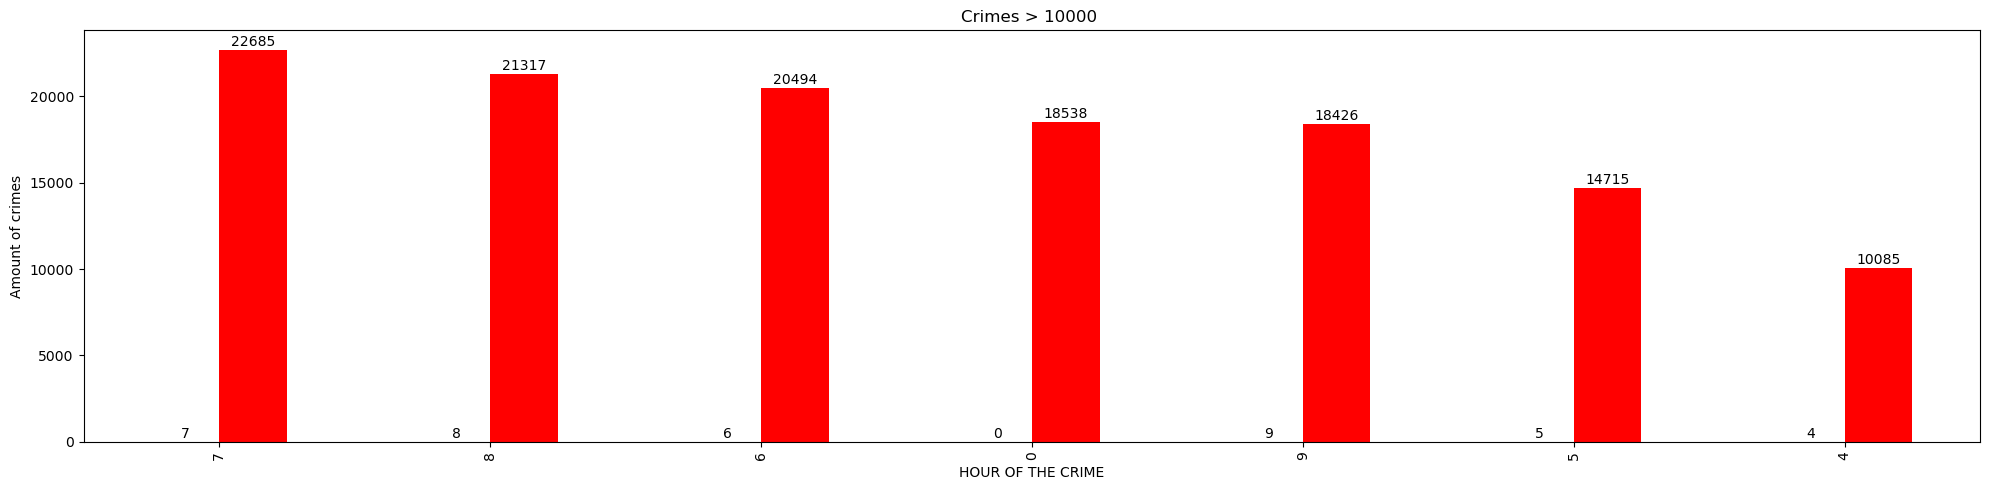

In [15]:
ax = top_10.plot(kind="bar", color="red", figsize=(20, 5))
ax.get_legend().set_visible(False)

# Loop through each bar and add text above it
# Use ax.patches to get the bars
for i, rect in enumerate(ax.patches):  
   # Get the height of each bar 
    height = rect.get_height()  
    ax.text(rect.get_x() + rect.get_width() / 2, height + 50, str(int(height)), ha='center', va='bottom')

# Set a title for the chart
plt.title("Crimes > 10000 ")
plt.xlabel("HOUR OF THE CRIME")
plt.ylabel("Amount of crimes")

plt.tight_layout()
plt.show()

The correlation between hour of the crime and the type of crime is 0.367


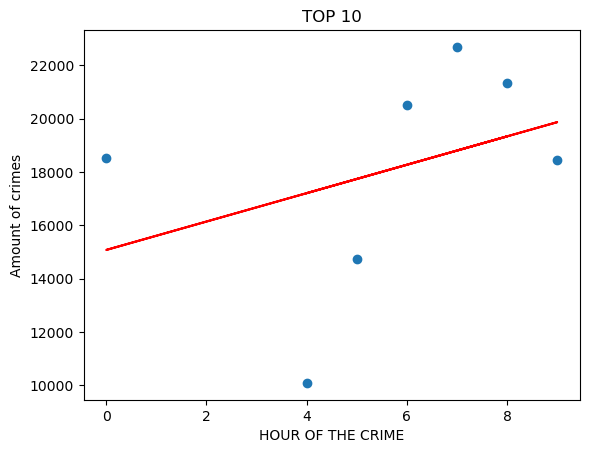

In [50]:

x_values=top_10["OCCURRED TO_time"]
y_values=top_10["UCR CRIME CATEGORY"]

#Calculate the correlation and print it
correlation = round(st.pearsonr(x_values, y_values)[0], 3)
print(f"The correlation between hour of the crime and the type of crime is {correlation}")

#Calculate the line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")

# Add labels
plt.title("TOP 10")
plt.xlabel("HOUR OF THE CRIME")
plt.ylabel("Amount of crimes")

#Show plot
plt.show()

In [117]:
times = clean_crime_vs_time.groupby("UCR CRIME CATEGORY")["OCCURRED TO_time"].value_counts().sort_index()
times.head()

UCR CRIME CATEGORY  OCCURRED TO_time
AGGRAVATED ASSAULT  0                   1601
                    1                    829
                    2                    830
                    3                    688
                    4                    496
Name: count, dtype: int64

In [160]:
time_crime=pd.DataFrame(times)
time_crime

count
UCR CRIME CATEGORY OCCURRED TO_time       
AGGRAVATED ASSAULT 0                  1601
                   1                   829
                   2                   830
                   3                   688
                   4                   496
...                                    ...
ROBBERY            19                  563
                   20                  584
                   21                  570
                   22                  489
                   23                  512

[216 rows x 1 columns]

In [179]:
max=filter_data.loc[filter_data["OCCURRED TO_time"]].max().head(10)
max

OCCURRED TO_time            2
UCR CRIME CATEGORY    ROBBERY
Crime count              9015
dtype: object